In [1]:
from utils import *
from tqdm import tqdm
from pymoo.vendor.vendor_coco import COCOProblem
from pymoo.problems import get_problem
import polars as pl

In [2]:
save_dir = 'scale_2_problem'
create_directory_if_not_exist(save_dir)

In [3]:
problem_dim = 5
n_runs = 100
n_evals = 1000
sample_size = 250
problem_dim = 5

In [4]:
#suite = generate_problems(problem_dim, 300)

In [5]:
#suite

In [6]:
runs_dir = f'{save_dir}/runs'
create_directory_if_not_exist(runs_dir)

In [7]:
P = pl.read_parquet(f'{runs_dir}/*').sort(['problem', 'instance'])
P

GA,PSO,DE,CMAES,ES,algorithm_run,problem,instance,optimum
f64,f64,f64,f64,f64,i64,i32,i32,f64
79.480004,79.48,79.48,79.48,79.480384,0,1,1,79.48
79.480013,79.48,79.48,79.48,79.481348,1,1,1,79.48
79.480011,79.48,79.48,79.48,79.48013,2,1,1,79.48
79.480002,79.48,79.48,79.48,79.481059,3,1,1,79.48
79.480004,79.48,79.48,79.48,79.480959,4,1,1,79.48
…,…,…,…,…,…,…,…,…
165.237321,163.966211,165.145521,155.729046,161.44505,24,24,15,149.81
160.237609,164.695048,163.771926,157.201823,168.96747,25,24,15,149.81
166.914187,154.651195,162.012215,150.327537,165.863525,21,24,15,149.81


In [8]:
#P.group_by(['problem','instance']).count()

In [9]:
S = pl.read_parquet(f'{save_dir}/samples__dim_{problem_dim}__samplesize_{sample_size}.parquet').sort(['problem', 'instance'])
S

problem,instance,y,optimum,x_0,x_1,x_2,x_3,x_4
i64,i64,f64,f64,f64,f64,f64,f64,f64
1,1,165.046834,79.48,-4.229127,2.787666,-4.49542,-0.453723,2.799324
1,1,145.549628,79.48,-3.550885,-4.083994,-2.119983,2.793942,3.669928
1,1,124.696057,79.48,3.069342,2.30582,0.784458,-2.835826,-3.263183
1,1,181.169573,79.48,4.311556,-3.766387,3.842537,-1.696492,3.984597
1,1,124.411867,79.48,2.756261,3.100243,-4.234954,4.753906,-2.211172
…,…,…,…,…,…,…,…,…
24,15,246.884869,149.81,1.347734,-2.153294,-1.176135,2.364704,-0.516795
24,15,372.082841,149.81,4.87877,1.051937,-1.893373,-4.335428,-4.617713
24,15,394.905955,149.81,-3.724222,-3.088483,4.794444,-3.299469,3.018012


In [10]:
F = S.group_by(['problem', 'instance']).agg([
    (pl.col('y').max() - pl.col('y').min()).alias('y_max_min_diff')
]).sort(['problem', 'instance'])
F

problem,instance,y_max_min_diff
i64,i64,f64
1,1,149.310152
1,2,239.340499
1,3,228.249082
1,4,210.016413
1,5,199.365774
…,…,…
24,11,256.010351
24,12,256.99983
24,13,333.7252


In [11]:
precision = P.with_columns([
    (pl.col('GA')-pl.col('optimum')).alias('GA'),
    (pl.col('PSO')-pl.col('optimum')).alias('PSO'),
    (pl.col('DE')-pl.col('optimum')).alias('DE'),
    (pl.col('CMAES')-pl.col('optimum')).alias('CMAES'),
    (pl.col('ES')-pl.col('optimum')).alias('ES')
]).with_columns([
    pl.col("problem").cast(pl.Int64),
    pl.col("instance").cast(pl.Int64)
])
precision = precision.group_by(['problem','instance']).mean().with_columns([
    pl.col("problem").cast(pl.Int64),
    pl.col("instance").cast(pl.Int64)
]).sort(['problem', 'instance'])
precision

problem,instance,GA,PSO,DE,CMAES,ES,algorithm_run,optimum
i64,i64,f64,f64,f64,f64,f64,f64,f64
1,1,0.000016,2.8848e-14,0.0,7.9581e-15,0.001136,49.5,79.48
1,2,0.000013,2.7853e-14,0.0,1.7053e-15,0.001047,49.5,394.48
1,3,0.000013,3.3159e-14,0.0,7.5791e-15,0.00092,14.5,-247.11
1,4,0.000013,1.8948e-14,0.0,8.5265e-15,0.001631,14.5,-152.04
1,5,0.000012,9.9476e-15,0.0,5.9212e-15,0.001467,14.5,-25.25
…,…,…,…,…,…,…,…,…
24,11,14.31429,9.360397,11.982249,6.805988,16.086218,14.5,326.65
24,12,11.846366,10.339549,12.413606,7.110512,15.602956,14.5,58.93
24,13,13.904399,10.006409,13.424855,6.835765,16.023624,14.5,45.9


In [12]:
ranks = get_ranks(P).group_by(['problem','instance']).mean().with_columns([
    pl.col("problem").cast(pl.Int64),
    pl.col("instance").cast(pl.Int64)
]).sort(['problem', 'instance'])
ranks

problem,instance,GA,PSO,DE,CMAES,ES,algorithm_run
i64,i64,f64,f64,f64,f64,f64,f64
1,1,4.0,2.22,1.615,2.165,5.0,49.5
1,2,4.0,2.16,1.9,1.94,5.0,49.5
1,3,4.0,2.2,1.716667,2.083333,5.0,14.5
1,4,4.0,2.05,1.75,2.2,5.0,14.5
1,5,4.0,2.316667,1.35,2.333333,5.0,14.5
…,…,…,…,…,…,…,…
24,11,3.9,2.3,3.166667,1.3,4.333333,14.5
24,12,3.0,2.533333,3.566667,1.533333,4.366667,14.5
24,13,3.733333,2.433333,3.2,1.4,4.233333,14.5


In [13]:
prec_features = precision.join(F, on=['problem', 'instance'], how='inner')
prec_features

problem,instance,GA,PSO,DE,CMAES,ES,algorithm_run,optimum,y_max_min_diff
i64,i64,f64,f64,f64,f64,f64,f64,f64,f64
1,1,0.000016,2.8848e-14,0.0,7.9581e-15,0.001136,49.5,79.48,149.310152
1,2,0.000013,2.7853e-14,0.0,1.7053e-15,0.001047,49.5,394.48,239.340499
1,3,0.000013,3.3159e-14,0.0,7.5791e-15,0.00092,14.5,-247.11,228.249082
1,4,0.000013,1.8948e-14,0.0,8.5265e-15,0.001631,14.5,-152.04,210.016413
1,5,0.000012,9.9476e-15,0.0,5.9212e-15,0.001467,14.5,-25.25,199.365774
…,…,…,…,…,…,…,…,…,…
24,11,14.31429,9.360397,11.982249,6.805988,16.086218,14.5,326.65,256.010351
24,12,11.846366,10.339549,12.413606,7.110512,15.602956,14.5,58.93,256.99983
24,13,13.904399,10.006409,13.424855,6.835765,16.023624,14.5,45.9,333.7252


In [14]:
rank_features = ranks.join(F, on=['problem', 'instance'], how='inner')
rank_features

problem,instance,GA,PSO,DE,CMAES,ES,algorithm_run,y_max_min_diff
i64,i64,f64,f64,f64,f64,f64,f64,f64
1,1,4.0,2.22,1.615,2.165,5.0,49.5,149.310152
1,2,4.0,2.16,1.9,1.94,5.0,49.5,239.340499
1,3,4.0,2.2,1.716667,2.083333,5.0,14.5,228.249082
1,4,4.0,2.05,1.75,2.2,5.0,14.5,210.016413
1,5,4.0,2.316667,1.35,2.333333,5.0,14.5,199.365774
…,…,…,…,…,…,…,…,…
24,11,3.9,2.3,3.166667,1.3,4.333333,14.5,256.010351
24,12,3.0,2.533333,3.566667,1.533333,4.366667,14.5,256.99983
24,13,3.733333,2.433333,3.2,1.4,4.233333,14.5,333.7252


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

algorithms=["GA", "PSO", "DE", "CMAES", "ES"]

data = []
error_metric = mean_squared_error

for problem_index in range(1, 25):
    train_df, test_df = prec_features.filter(pl.col('problem')!=problem_index), prec_features.filter(pl.col('problem')==problem_index)

    X_train = train_df[['y_max_min_diff']]
    Y_train = train_df[algorithms]
    X_test = test_df[['y_max_min_diff']]
    Y_test = test_df[algorithms]

    model = RandomForestRegressor(n_jobs=-1)
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    error_rf = error_metric(pred, Y_test)

    model = MultiOutputRegressor(HistGradientBoostingRegressor(monotonic_cst=[1]), n_jobs=-1)
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    error_lr = error_metric(pred, Y_test)

    model = DummyRegressor()
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    error_dm = error_metric(pred, Y_test)
    print(error_rf, error_lr, error_dm)

    data.append({'model': 'rf', 'error': error_rf, 'problem': problem_index})
    # data.append({'model': 'lr', 'error': error_lr, 'problem': problem_index})
    data.append({'model': 'dummy', 'error': error_dm, 'problem': problem_index})

/opt/conda/envs/Base/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: Using fork() can cause Polars to deadlock in the child process.
In addition, using fork() with Python in general is a recipe for mysterious
deadlocks and crashes.

The most likely reason you are seeing this error is because you are using the
multiprocessing module on Linux, which uses fork() by default. This will be
fixed in Python 3.14. Until then, you want to use the "spawn" context instead.

See https://docs.pola.rs/user-guide/misc/multiprocessing/ for details.

If you really know what your doing, you can silence this warning with the warning module
or by setting POLARS_ALLOW_FORKING_THREAD=1.

  pid = os.fork()


13.124930431489073 1.3879270669692194 798.9179389887111
8649.214863152389 6071.535959502093 768.4237945260876
11.485098390589494 8.838314696397585 706.7926768404411
11.178901418554378 13.726199754087883 699.9298064701761
0.02516516365441221 1.0428228424320853 794.4899534011226
18.297933625783195 55.063905127194424 793.6710926801554
33.685056894069525 5.232462162722156 773.4725793345827
24.092066687728778 2.608683717394386 715.2953771287494
29.634636907611185 30.518109453019104 601.9611388287734
333815.9221329268 322544.71115382423 344080.790092325
221001.60455036318 47874.91534672289 236.8839741360558
103836.62823769115 92937.13613904489 32381.001443383597
31.230488814275827 43.63151388639527 485.50016860990047
9.81184081687137 6.5986724805950745 798.7845039514085
38.38582834049798 36.82796590430756 439.71350844679574
57.74923613720654 1.5392516405109489 707.07719408693
6.348785271586297 3.834142370553761 787.8461733841228
11.399696612175333 3.58311211260092 753.1780692131049
23.715388

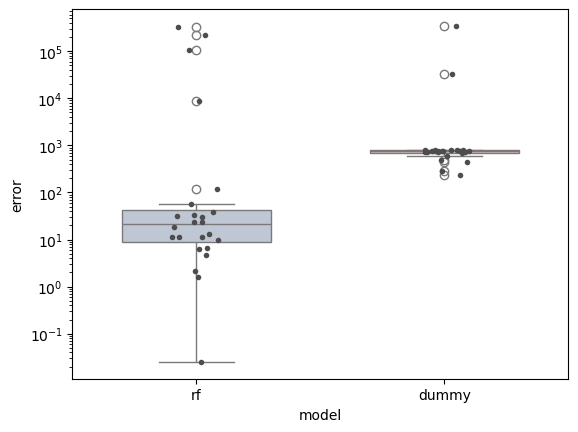

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

df_prec = pl.DataFrame(data)

sns.boxplot(
    data=df_prec.to_pandas(), x="model", y="error", hue="model", width=.6, palette="vlag"
)
plt.yscale('log')
sns.stripplot(data=df_prec.to_pandas(), x="model", y="error", size=4, color=".3")
plt.savefig(f'figures/lpo_precision.pdf', bbox_inches='tight', pad_inches=0)

In [17]:
df_prec

model,error,problem
str,f64,i64
"""rf""",13.12493,1
"""dummy""",798.917939,1
"""rf""",8649.214863,2
"""dummy""",768.423795,2
"""rf""",11.485098,3
…,…,…
"""dummy""",730.910688,22
"""rf""",4.676283,23
"""dummy""",744.986697,23


In [18]:
rfe = df_prec.filter(pl.col('model')=='rf').sort('problem')['error'].to_list()
dfe = df_prec.filter(pl.col('model')=='dummy').sort('problem')['error'].to_list()
print(rfe)
print(dfe)

[13.124930431489073, 8649.214863152389, 11.485098390589494, 11.178901418554378, 0.02516516365441221, 18.297933625783195, 33.685056894069525, 24.092066687728778, 29.634636907611185, 333815.9221329268, 221001.60455036318, 103836.62823769115, 31.230488814275827, 9.81184081687137, 38.38582834049798, 57.74923613720654, 6.348785271586297, 11.399696612175333, 23.71538808144249, 6.69881882582809, 1.6389987914634907, 2.1862463450923473, 4.676282931361081, 118.49716509668299]
[798.9179389887111, 768.4237945260876, 706.7926768404411, 699.9298064701761, 794.4899534011226, 793.6710926801554, 773.4725793345827, 715.2953771287494, 601.9611388287734, 344080.790092325, 236.8839741360558, 32381.001443383597, 485.50016860990047, 798.7845039514085, 439.71350844679574, 707.07719408693, 787.8461733841228, 753.1780692131049, 760.7600148557289, 773.8368147054928, 746.6437678328405, 730.910687970174, 744.9866968446433, 284.4305354968184]


In [19]:
import numpy as np
from scipy.stats import wilcoxon

data1 = rfe
data2 = dfe

stat, p_value = wilcoxon(data1, data2)

print("Wilcoxon signed-rank test statistic:", stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference between distributions.")
else:
    print("Fail to reject the null hypothesis: No significant difference between distributions.")

Wilcoxon signed-rank test statistic: 68.0
P-value: 0.017870306968688965
Reject the null hypothesis: Significant difference between distributions.


In [20]:
#for problem_instance_index in prec_features['instance'].unique().to_list():
#    print()

In [21]:
def pairwise_error(true, pred):
    algorithms = true.columns
    false_pairs = 0
    all_pairs = 0
    for algo1 in algorithms:
        for algo2 in algorithms:
            if algo1==algo2:
                continue
            orders = ((true[algo1] < true[algo2]) != (pred[algo1] < pred[algo2])).to_numpy()
            false_pairs += orders.sum()
            all_pairs += len(orders)
    return false_pairs/all_pairs

data = []

def tran_test_model(model, X_train, Y_train, X_test):
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    return pl.DataFrame(pred, schema=Y_train.columns)

for problem_index in range(1, 25):
    train_df, test_df = prec_features.filter(pl.col('problem')!=problem_index), prec_features.filter(pl.col('problem')==problem_index)
    train_df_rank, test_df_rank = rank_features.filter(pl.col('problem')!=problem_index), rank_features.filter(pl.col('problem')==problem_index)

    X_train = train_df[['y_max_min_diff']]
    Y_train = train_df[algorithms]
    X_test = test_df[['y_max_min_diff']]
    Y_test = test_df[algorithms]
    
    Y_train_rank = train_df_rank[algorithms]
    Y_test_rank = test_df_rank[algorithms]
    
    pred_prec_rf = tran_test_model(RandomForestRegressor(n_jobs=-1), X_train, Y_train, X_test)
    error_prec_rf = pairwise_error(Y_test_rank, pred_prec_rf)
    
    pred_rank_rf = tran_test_model(RandomForestRegressor(n_jobs=-1), X_train, Y_train_rank, X_test)
    error_rank_rf = pairwise_error(Y_test_rank, pred_rank_rf)
    
    pred_prec_dummy = tran_test_model(DummyRegressor(), X_train, Y_train, X_test)
    error_prec_dummy = pairwise_error(Y_test_rank, pred_prec_dummy) 
    
    pred_rank_dummy = tran_test_model(DummyRegressor(), X_train, Y_train_rank, X_test)
    error_rank_dummy = pairwise_error(Y_test_rank, pred_rank_dummy) 
    
    model_rf_ranks = RandomForestRegressor(n_jobs=-1)
    model_rf_ranks.fit(X_train, Y_train_rank)
    pred_rf_ranks = model_rf_ranks.predict(X_test)
    pred_rf_ranks = pl.DataFrame(pred_rf_ranks, schema=Y_train.columns)
    pre_rf_ranks = pairwise_error(Y_test_rank, pred_rf_ranks)

    data.append({'model': 'rf-prec', 'error': error_prec_rf, 'problem': problem_index})
    data.append({'model': 'dummy-prec', 'error': error_prec_dummy, 'problem': problem_index})
    data.append({'model': 'dummy-rank', 'error': error_rank_dummy, 'problem': problem_index})
    data.append({'model': 'rf-rank', 'error': error_rank_rf, 'problem': problem_index})

<Axes: xlabel='model', ylabel='error'>

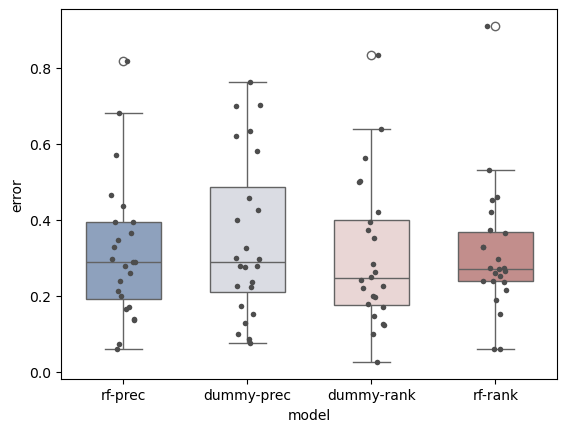

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

df_rank = pl.DataFrame(data)

sns.boxplot(
    data=df_rank.to_pandas(), x="model", y="error", hue="model", width=.6, palette="vlag"
)
sns.stripplot(data=df_rank.to_pandas(), x="model", y="error", size=4, color=".3")
#plt.savefig(f'figures/lpo_precision.pdf', bbox_inches='tight', pad_inches=0)

In [46]:
#df_rank

In [24]:
rf_prec = df_rank.filter(pl.col('model')=='rf-prec').sort('problem')['error'].to_list()
dummy_prec = df_rank.filter(pl.col('model')=='dummy-prec').sort('problem')['error'].to_list()
rf_rank = df_rank.filter(pl.col('model')=='rf-rank').sort('problem')['error'].to_list()
dummy_rank = df_rank.filter(pl.col('model')=='dummy-rank').sort('problem')['error'].to_list()
# print(rf_prec)
# print(dummy_prec)
# print(rf_rank)
# print(dummy_rank)

In [25]:
from scipy.stats import friedmanchisquare

# Ensure all distributions have the same length (each corresponds to the same problems)
assert len(rf_prec) == len(dummy_prec) == len(rf_rank) == len(dummy_rank), "All distributions must have the same length."

# Perform the Friedman test
stat, p_value = friedmanchisquare(rf_prec, dummy_prec, rf_rank, dummy_rank)

# Print the results
print("Friedman test statistic:", stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one distribution is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant differences between distributions.")

Friedman test statistic: 1.675324675324687
P-value: 0.6424335466070137
Fail to reject the null hypothesis: No significant differences between distributions.


In [ ]:
#rf-precision, mean-precision, rf-rank, mean-rank

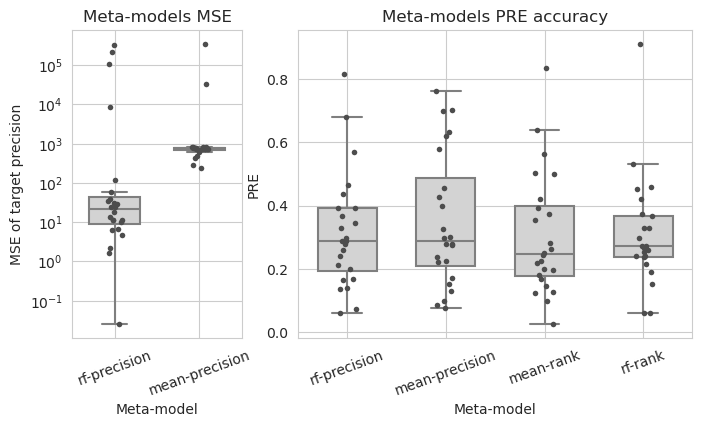

In [60]:
width_ratios = [0.3, 0.7]

sns.set_style("whitegrid")
sns.set_palette("gray")

fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': width_ratios}, figsize=(8, 4))

pddf_prec = df_prec.to_pandas()
pddf_prec['model'] = pddf_prec['model'].map({'rf': 'rf-precision', 'dummy': 'mean-precision'})
sns.boxplot(
    data=pddf_prec, x="model", y="error", width=.6, ax=ax1, showfliers=False, linewidth=1.5, color="lightgray"
)
ax1.set_yscale('log')
sns.stripplot(data=pddf_prec, x="model", y="error", size=4, color=".3", ax=ax1)
ax1.set_ylabel("MSE of target precision")


pddf_rank = df_rank.to_pandas()
pddf_rank['model'] = pddf_rank['model'].map({
    'rf-prec': 'rf-precision', 
    'dummy-prec': 'mean-precision',
    'rf-rank': 'rf-rank', 
    'dummy-rank': 'mean-rank',
})
sns.boxplot(
    data=pddf_rank, x="model", y="error", width=.6, ax=ax2, showfliers=False, linewidth=1.5, color="lightgray"
)
sns.stripplot(data=pddf_rank, x="model", y="error", size=4, color=".3", ax=ax2)
ax2.set_ylabel("PRE")

ax1.grid(True)
ax2.grid(True)
ax1.set_xlabel('Meta-model')
ax2.set_xlabel('Meta-model')
ax1.tick_params(axis='x', labelrotation=20)
ax2.tick_params(axis='x', labelrotation=20)
ax2.set_title('Meta-models PRE accuracy')
ax1.set_title('Meta-models MSE')

plt.savefig(f'figures/lpo_precision_pre.pdf', bbox_inches='tight', pad_inches=0)

In [28]:
#X_test.head(5)

In [29]:
#v = pl.DataFrame({'y_max_min_diff': np.logspace(1, 12, num=100)})

In [30]:
#L = model.predict(v)

In [31]:
#plt.plot(L[:, 3])
#plt.xscale('log')
#plt.yscale('log')

In [32]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#
#sns.scatterplot(data=prec_features.to_pandas(), x='GA', y='y_max_min_diff')
#plt.xscale('log')
#plt.yscale('log')

In [33]:
#v1 = list(Y_train['CMAES'])
#v2 = list(X_train['y_max_min_diff'])
#plt.scatter(v1, v2)
#plt.xscale('log')
#plt.yscale('log')
#
#v1 = list(Y_test['CMAES'])
#v2 = list(X_test['y_max_min_diff'])
#plt.scatter(v1, v2)

In [34]:
#model = HistGradientBoostingRegressor()#loss='absolute_error')
#model.fit(X_train[['y_max_min_diff']], Y_train['CMAES'])

In [35]:
#h = np.logspace(1, 14, num=100)
#v = pl.DataFrame({'y_max_min_diff': h})
#l = model.predict(v)
#l

In [36]:
#plt.plot(h, l)
#
#v2 = list(Y_train['CMAES'])
#v1 = list(X_train['y_max_min_diff'])
#plt.scatter(v1, v2)
#
#
#v2 = list(Y_test['CMAES'])
#v1 = list(X_test['y_max_min_diff'])
#plt.scatter(v1, v2)
#
#plt.xscale('log')
#plt.yscale('log')